In this post, we're going to try to understand and get some intuition about the `networkx` spring layout algorithm.

# A simple example 

Let's start with a simple graph.

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()
G.add_node(0)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edge(0, 1)
G.add_edge(0, 3)
G.add_edge(2, 3)
G.add_edge(0, 2)

We can represent this network visually using the `nx.draw_xxx` commands. For instance, we can randomly place the nodes:

In [3]:
%matplotlib inline

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:124: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:136: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


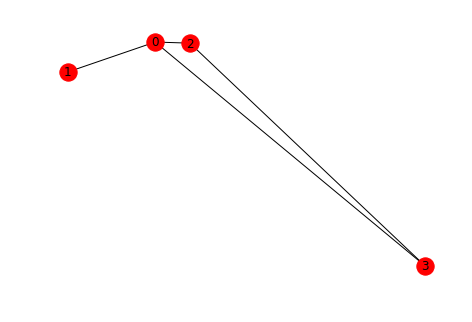

In [4]:
nx.draw_random(G, with_labels=True)

Let's focus on the spring layout. Let's use it on this graph.

In [5]:
layout = nx.spring_layout(G, dim=2)

In [6]:
nx.__version__

'1.10'

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:124: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:136: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


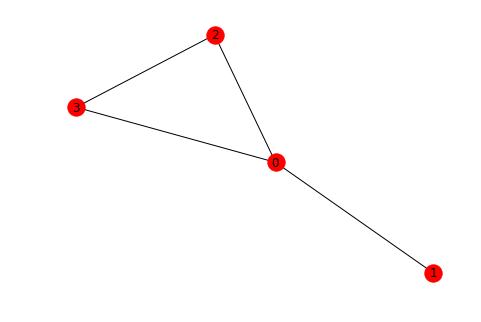

In [7]:
nx.draw(G, layout, with_labels=True)

Let's try to build some intuition on how this works. The spring layout algorithm has a lot of options we can try. For instance, we can explore what the iteration parameter does.

In [8]:
initial_pos = {0: (0., 0.), 1: (1, 0), 2: (2, 1), 3: (3, 0)}

In [9]:
layout = nx.spring_layout(G, dim=2, iterations=1, fixed=[0], pos=initial_pos)

C:\Anaconda3\lib\site-packages\networkx\drawing\layout.py:330: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pos==None:


In [10]:
layout

{0: array([ 0.,  0.]),
 1: array([ 0.84705928, -0.25808746]),
 2: array([ 1.70789324,  1.06836403]),
 3: array([ 2.70031977, -0.01384775])}

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:124: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:136: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


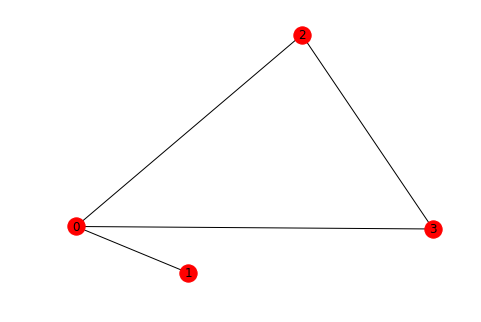

In [11]:
nx.draw(G, layout, with_labels=True)

 98%|█████████████████████████████████████████▎| 60/61 [00:03<00:00, 18.97it/s]


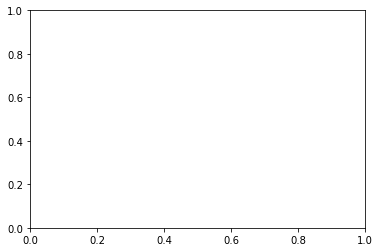

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

duration = 3
max_iterations = 100
fig, ax = plt.subplots()
def make_frame(t):
    current_iter = int(max_iterations / duration * t)
    ax.clear()
    layout = nx.spring_layout(G, dim=2, iterations=current_iter, fixed=[0], pos=initial_pos)
    nx.draw(G, layout, with_labels=True, ax=ax, )
    ax.set_title('iteration #{}/{}'.format(current_iter, max_iterations))
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
plt.close(fig)
animation.ipython_display(fps=20, loop=True, autoplay=True)

As we have seen above, the layout that is obtained is quite nice. 

Let's try with a more complicated graph.

In [13]:
G_dense = nx.wheel_graph(30)

In [14]:
initial_pos_dense = nx.random_layout(G_dense)

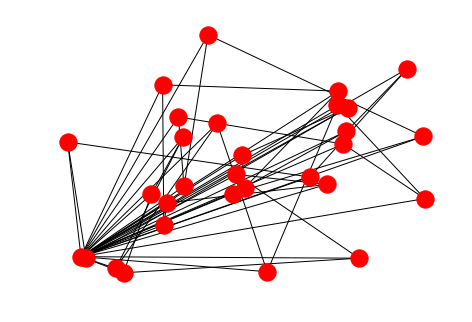

In [15]:
nx.draw(G_dense, initial_pos_dense)

In [16]:
from IPython.display import display

 98%|█████████████████████████████████████████▎| 60/61 [00:05<00:00, 12.01it/s]


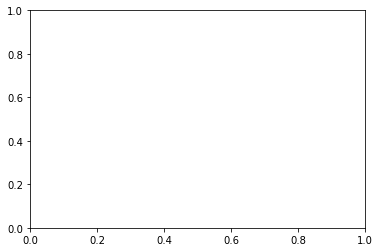

In [17]:
duration = 3
max_iterations = 100
fig, ax = plt.subplots()
def make_frame(t):
    current_iter = int(max_iterations / duration * t)
    ax.clear()
    layout_dense = nx.spring_layout(G_dense, iterations=current_iter, pos=initial_pos_dense, fixed=[0])
    nx.draw(G_dense, layout_dense, with_labels=True, ax=ax)
    ax.set_title('iteration #{}/{}'.format(current_iter, max_iterations))
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
plt.close(fig)
animation.ipython_display(fps=20, loop=True, autoplay=True)

How does this work? Let's go more in depth.

# Force directed algorithms

It turns out that `networkx` uses an algorithm called the Fruchterman Reingold algorithm, which is a [force directed graph layout algorithm](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).

As can be read in the quoted Wikipedia page, the history of force directed graphs can be described as follows:


> The combination of attractive forces on adjacent vertices, and repulsive forces on all vertices, was first used by Eades (1984);[15] additional pioneering work on this type of force-directed layout was done by Fruchterman & Reingold (1991).[12] The idea of using only spring forces between all pairs of vertices, with ideal spring lengths equal to the vertices' graph-theoretic distance, is from Kamada & Kawai (1989).[11]

So the three basic models for force directed placement would be:

- Eades: attractive forces on adjacent vertices, repulsive forces everywhere else
- Kamada & Kawai: spring forces with ideal lengths between all pairs of vertices
- Fruchterman & Reingold: something else

Since we are interested in the all of these methods, let's look at each of them in turn. What is interesting between all of them is that we can define forces of different types and move the nodes as a function of these forces.

## Fruchterman Reingold 

As of the current implementation of `networkx`, the main loop of this function is as follows:

```python
    # optimal distance between nodes
    if k is None:
        k = np.sqrt(1.0/nnodes)
    # the initial "temperature"  is about .1 of domain area (=1x1)
    # this is the largest step allowed in the dynamics.
    # We need to calculate this in case our fixed positions force our domain
    # to be much bigger than 1x1
    t = max(max(pos.T[0]) - min(pos.T[0]), max(pos.T[1]) - min(pos.T[1]))*0.1
    # simple cooling scheme.
    # linearly step down by dt on each iteration so last iteration is size dt.
    dt = t/float(iterations+1)
    delta = np.zeros((pos.shape[0], pos.shape[0], pos.shape[1]), dtype=A.dtype)
    # the inscrutable (but fast) version
    # this is still O(V^2)
    # could use multilevel methods to speed this up significantly
    for iteration in range(iterations):
        # matrix of difference between points
        for i in range(pos.shape[1]):
            delta[:, :, i] = pos[:, i, None] - pos[:, i]
        # distance between points
        distance = np.sqrt((delta**2).sum(axis=-1))
        # enforce minimum distance of 0.01
        distance = np.where(distance < 0.01, 0.01, distance)
        # displacement "force"
        displacement = np.transpose(np.transpose(delta) *
                                    (k * k / distance**2 - A * distance / k)
                                    ).sum(axis=1)
        # update positions
        length = np.sqrt((displacement**2).sum(axis=1))
        length = np.where(length < 0.01, 0.1, length)
        delta_pos = np.transpose(np.transpose(displacement) * t / length)
        if fixed is not None:
            # don't change positions of fixed nodes
            delta_pos[fixed] = 0.0
        pos += delta_pos
        # cool temperature
        t -= dt
```

So, this implementation involves:

- computing distances between the nodes
- computing a force vector from it (named `displacement` in the above code)
- adding the effect of the force times the time increment to the position


Ways of solving the problem:

- C. Rossant's minimization problem http://ipython-books.github.io/featured-02/
- the original article: http://onlinelibrary.wiley.com/doi/10.1002/spe.4380211102/epdf